In [2]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv("E:\github\Soomvaar\Social Media Ads\Dataset\Social_Network_Ads.csv")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
data.info()
print("Shape: ",data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
Shape:  (400, 5)


In [5]:
data.drop("User ID", axis=1,inplace = True)
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
# Are there any null values????
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# features and target
features = data.drop("Purchased", axis=1)
target = data["Purchased"]
print("------------------FEATURES--------------------")
print(features)
print(' ')
print("--------------TARGET-----------------")
print(target)



------------------FEATURES--------------------
     Gender  Age  EstimatedSalary
0      Male   19            19000
1      Male   35            20000
2    Female   26            43000
3    Female   27            57000
4      Male   19            76000
..      ...  ...              ...
395  Female   46            41000
396    Male   51            23000
397  Female   50            20000
398    Male   36            33000
399  Female   49            36000

[400 rows x 3 columns]
 
--------------TARGET-----------------
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [8]:
# handling categorical values
new_features = pd.get_dummies(features, drop_first = True)
print(new_features)

     Age  EstimatedSalary  Gender_Male
0     19            19000            1
1     35            20000            1
2     26            43000            0
3     27            57000            0
4     19            76000            1
..   ...              ...          ...
395   46            41000            0
396   51            23000            1
397   50            20000            0
398   36            33000            1
399   49            36000            0

[400 rows x 3 columns]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(new_features,target,random_state=133)

In [10]:
# model and fit
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [11]:
# predictions
y_pred = model.predict(x_test)
print("---------------------------CLASSIFICATION REPORT----------------------------------")
cr = classification_report(y_test,y_pred)
print(cr)

---------------------------CLASSIFICATION REPORT----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        69
           1       0.85      0.90      0.88        31

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



In [12]:
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)
print("Training score:", round(train_score,2))
print("Testing score: ", test_score)

Training score: 0.89
Testing score:  0.92


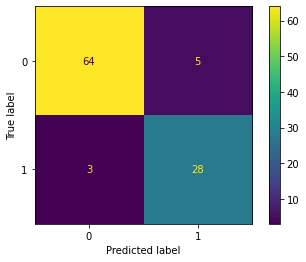

In [13]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [14]:
# predictions on unknown data
a = float(input("Enter age: "))
est_sal = float(input("Enter estimated salary: "))
opt = int(input("1. Female  2. Male: "))
if opt == 1:
  d = [[a,est_sal,0]]
else:
  d = [[a,est_sal,1]]

result = model.predict(d)
print("Will purchase?(0-No/1-Yes): ", result)
print("Probablities of 0[No] and 1[Yes]: ", model.predict_proba(d))

Will purchase?(0-No/1-Yes):  [0]
Probablities of 0[No] and 1[Yes]:  [[0.98552265 0.01447735]]
